<a href="https://colab.research.google.com/github/EnterTheBeginning/Machine-Learning/blob/master/HW1_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data


In [2]:
from keras.datasets import mnist

(X_train_original, y_train_original), (X_test_original, y_test_original) = mnist.load_data()

Using TensorFlow backend.


In [0]:
X_train = X_train_original.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = X_test_original.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255

In [0]:
y_train, y_test = y_train_original.reshape(60000,1),y_test_original.reshape(10000,1)



##Lucky number 7:

Classifer for number 7.  Anything except 7 is Zero and If y == 7 we have output of 1



In [0]:
y1_train = np.zeros(y_train.shape)
y1_train[np.where(y_train == 7.0)[0]] = 1
y_train = y1_train

y1_test = np.zeros(y_test.shape)
y1_test[np.where(y_test == 7.0)[0]] = 1
y_test = y1_test


Now that we have input and output ready   
Lets start building the first layer

##Logistic regression with mean squared error loss.

1.   Weights
2.   Bias
3. Activation
4. Input X   
n = Number of Features which is 784   
m = Number of samples which in training set is 60000


In [0]:

np.random.seed(47)
#W = np.random.rand(X_train.shape[1]).reshape(X_train.shape[1],1)
W = np.zeros((X_train.shape[1], 1))


In [7]:
W.shape

(784, 1)

In [8]:
b = np.zeros((1,1))
b.shape

(1, 1)

In [0]:
def Sigmoid(z):
    arg1 = 1 / (1 + np.exp(-z))
    return arg1


## Mean Squared Error (MSE):

---



In [0]:
class MSE:
  
  #class constructor
  #In order to save W for other methods such as prediction
  def __init__(self,W,b):
    self.W = np.zeros((X_train.shape[1],1))
    self.b = np.zeros((1,1))
  
    #Derivative of Loss 
  def derMSELoss(self,A,y):
    arg1 = A - y
    return arg1
  
    #Derivative of Sigmoid method  
  def derSigmoid(self,A):
      arg1 = A*(1-A)
      return arg1
    
    #Mean Squared Error method   
  def MSELoss(self,X, y,W,b):
      arg1 = (((Sigmoid(X.dot(W) + b)-y)**2)/2).mean()
      return arg1
   
    #Training weights and Biases
  def train(self, X, y,lr=0.01 , batch=128 , epochs = 1):
    m=60000

    history={"Loss":[]}

    for i in range(epochs):
      for e in range(0,m,batch):
        X1= X[e:e+batch]
        y1= y[e:e+batch]
        Z= X1.dot(self.W)+self.b
        # Activation function
        A = Sigmoid(Z)
        # Loss update
        Gradient= self.derMSELoss(A,y1)*(self.derSigmoid(A))
        # Updating the weights
        self.W= self.W - lr * np.dot(Gradient.T,X1).T/batch
        # Updating the bias
        self.b= self.b- lr*Gradient.mean()
      history["Loss"] += [self.MSELoss(X,y,self.W,self.b)]
      #Show the last history 
      print(" Loss: {}\n".format(history['Loss'][-1]))
    print("Test accuracy : {} %".format(100 - np.mean(np.abs(network.predict(X_test) - y_test))*100))  
    return history
    
  
  def predict(self,X):
        m = X.shape[0]
        #creating a prediction vector
        Z= X.dot(self.W)+self.b
        A = Sigmoid(Z)
        y_prediction = np.zeros((1,m))
        for i in range(A.shape[0]):
          if( A[i]>= 0.5):
            y_prediction[0,i] = 1
          else:
            y_prediction[0,i] = 0
        return y_prediction
    


###The results shown for the detection of Digit 7:

In [0]:
network = MSE(None,None)

In [24]:
results = network.train(X_train, y_train)

 Loss: 0.04319978968412678

Test accuracy : 89.91 %


###Visualization:

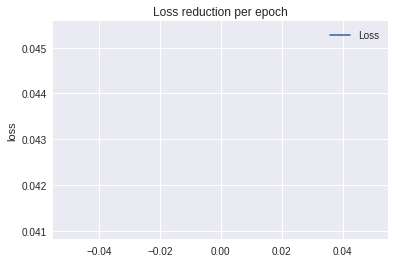

In [25]:
plt.figure(1)
plt.plot(results['Loss'], label='Loss')
# plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper right')
plt.title('Loss reduction per epoch')
plt.ylabel('loss') 
plt.show()


In [26]:
network.predict(X_test[:20])


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

##Loop for classification of all numbers


Reseting the labels

In [27]:
numbers = np.arange(10)
networks = []
history = []
for i in numbers:
    print("______________________________________")
    print("Training Classifier for the Number: {} ".format(i))
    y2_train = np.zeros(y_train_original.shape)
    y2_train[np.where(y_train_original == i)[0]] = 1
    y_train = y2_train
    y_train = y_train.reshape(60000,1)
    networks += [MSE(None,None)]
    history += [networks[-1].train(X_train, y_train)]
    
    y2_test = np.zeros(y_test_original.shape)
    y2_test[np.where(y_test_original == i)[0]] = 1
    y_test = y2_test
    y_test = y_test.reshape(10000,1)



______________________________________
Training Classifier for the Number: 0 
 Loss: 0.030129312476892323

Test accuracy : 89.91 %
______________________________________
Training Classifier for the Number: 1 
 Loss: 0.02779257968299318

Test accuracy : 90.2 %
______________________________________
Training Classifier for the Number: 2 
 Loss: 0.04216637457644036

Test accuracy : 88.65 %
______________________________________
Training Classifier for the Number: 3 
 Loss: 0.04214579819978914

Test accuracy : 89.68 %
______________________________________
Training Classifier for the Number: 4 
 Loss: 0.03824473588011028

Test accuracy : 89.9 %
______________________________________
Training Classifier for the Number: 5 
 Loss: 0.03993786367790622

Test accuracy : 90.18 %
______________________________________
Training Classifier for the Number: 6 
 Loss: 0.037978259013493804

Test accuracy : 91.08 %
______________________________________
Training Classifier for the Number: 7 
 Loss: 0.035

Takes a long time. This is the result for Only for 1 epoch